## Libraries 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import gc
import sys
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn import utils

## DATA ANALYSIS

In [6]:
cabs_data = pd.read_csv('cab_rides.csv', encoding='latin1')

In [7]:
cabs_data.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [8]:
cabs_data.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name'],
      dtype='object')

In [9]:
cabs_data.shape

(693071, 10)

In [10]:
cabs_data.describe()

,distance,time_stamp,price,surge_multiplier
count,693071.000000,6.930710e+05,637976.000000,693071.000000
mean,2.189430,1.544046e+12,16.545125,1.013870
std,1.138937,6.891925e+08,9.324359,0.091641
min,0.020000,1.543204e+12,2.500000,1.000000
25%,1.280000,1.543444e+12,9.000000,1.000000
50%,2.160000,1.543737e+12,13.500000,1.000000
75%,2.920000,1.544828e+12,22.500000,1.000000
max,7.860000,1.545161e+12,97.500000,3.000000


In [11]:
cabs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          693071 non-null  float64
 1   cab_type          693071 non-null  object 
 2   time_stamp        693071 non-null  int64  
 3   destination       693071 non-null  object 
 4   source            693071 non-null  object 
 5   price             637976 non-null  float64
 6   surge_multiplier  693071 non-null  float64
 7   id                693071 non-null  object 
 8   product_id        693071 non-null  object 
 9   name              693071 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 52.9+ MB


In [12]:
# cleaning of data
# checking null vallues in cabs data set
cabs_data.isna()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
693066,False,False,False,False,False,False,False,False,False,False
693067,False,False,False,False,False,False,False,False,False,False
693068,False,False,False,False,False,True,False,False,False,False
693069,False,False,False,False,False,False,False,False,False,False


In [13]:
cabs_data.isna().sum()

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price               55095
surge_multiplier        0
id                      0
product_id              0
name                    0
dtype: int64

In [14]:
# There are some missing values in the data set so we need to clean the data
# there are many ways to handle the missing data
# Either fill the missing data with mean or median values
# OR drop the rows of particular data missing
# Here my aim is to predict the fare so i would like to drop the values rather replacing it by mean or median
# It might cost me some false prediction

cabs_data = cabs_data.dropna(axis=0).reset_index(drop=True)
# axis = 0 indicates dropping of rows and then reseting index values by using drop is true

In [15]:
A_data = cabs_data.copy()
A_data

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL
...,...,...,...,...,...,...,...,...,...,...
637971,1.00,Uber,1543708385534,North End,West End,9.5,1.0,353e6566-b272-479e-a9c6-98bd6cb23f25,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV
637972,1.00,Uber,1543708385534,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL
637973,1.00,Uber,1543708385534,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX
637974,1.00,Uber,1543708385534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV


In [16]:
import datetime
A_data['datetime'] = pd.to_datetime(A_data['time_stamp'])
A_data

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,1970-01-01 00:25:44.952607890
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,1970-01-01 00:25:43.284023677
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,1970-01-01 00:25:43.366822198
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,1970-01-01 00:25:43.553582749
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,1970-01-01 00:25:43.463360223
...,...,...,...,...,...,...,...,...,...,...,...
637971,1.00,Uber,1543708385534,North End,West End,9.5,1.0,353e6566-b272-479e-a9c6-98bd6cb23f25,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,1970-01-01 00:25:43.708385534
637972,1.00,Uber,1543708385534,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,1970-01-01 00:25:43.708385534
637973,1.00,Uber,1543708385534,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,1970-01-01 00:25:43.708385534
637974,1.00,Uber,1543708385534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,1970-01-01 00:25:43.708385534


In [17]:
A_data['day'] = A_data.datetime.dt.day
A_data['hour'] = A_data.datetime.dt.hour

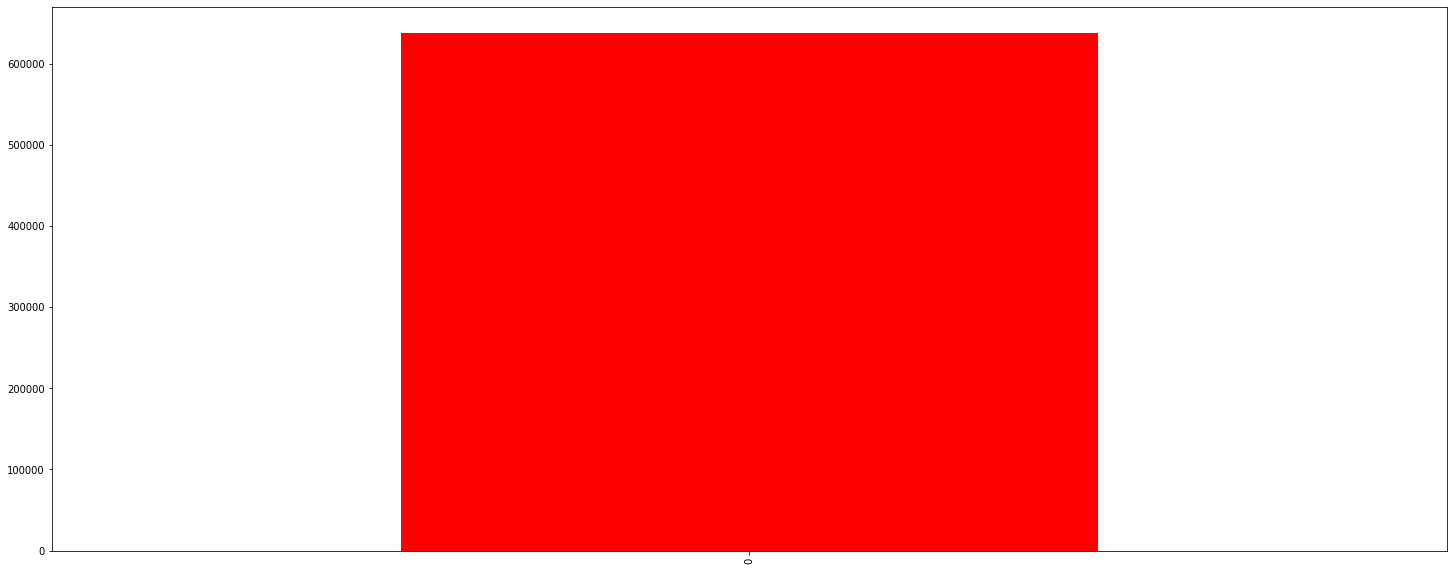

In [18]:
A_data['hour'].value_counts().plot(kind='bar', figsize=(25,10),color='Red')

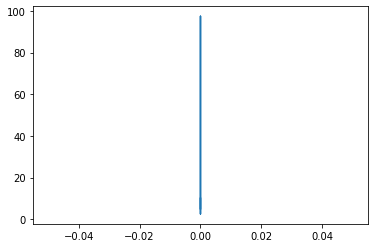

In [19]:
# Price vs hour
x = A_data['hour']
y = A_data['price']
plt.plot(x,y)
plt.show()

In [20]:
weather_data = pd.read_csv('weather.csv', encoding='latin1')

In [21]:
weather_data.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


In [22]:
weather_data.columns

Index(['temp', 'location', 'clouds', 'pressure', 'rain', 'time_stamp',
       'humidity', 'wind'],
      dtype='object')

In [23]:
weather_data.shape

(6276, 8)

In [24]:
weather_data.describe()

,temp,clouds,pressure,rain,time_stamp,humidity,wind
count,6276.000000,6276.000000,6276.000000,894.000000,6.276000e+03,6276.000000,6276.000000
mean,39.090475,0.677777,1008.445209,0.057652,1.543857e+09,0.763985,6.802812
std,6.022055,0.314284,12.870775,0.100758,6.659340e+05,0.127340,3.633466
min,19.620000,0.000000,988.250000,0.000200,1.543204e+09,0.450000,0.290000
25%,36.077500,0.440000,997.747500,0.004900,1.543387e+09,0.670000,3.517500
50%,40.130000,0.780000,1007.660000,0.014850,1.543514e+09,0.760000,6.570000
75%,42.832500,0.970000,1018.480000,0.060925,1.544691e+09,0.890000,9.920000
max,55.410000,1.000000,1035.120000,0.780700,1.545159e+09,0.990000,18.180000


In [25]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        6276 non-null   float64
 1   location    6276 non-null   object 
 2   clouds      6276 non-null   float64
 3   pressure    6276 non-null   float64
 4   rain        894 non-null    float64
 5   time_stamp  6276 non-null   int64  
 6   humidity    6276 non-null   float64
 7   wind        6276 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 392.4+ KB


In [26]:
# cleaning of weather data
# checking null vallues in weather data set
weather_data.isna()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
6271,False,False,False,False,True,False,False,False
6272,False,False,False,False,True,False,False,False
6273,False,False,False,False,True,False,False,False
6274,False,False,False,False,True,False,False,False


In [27]:
weather_data.isna().sum()

temp             0
location         0
clouds           0
pressure         0
rain          5382
time_stamp       0
humidity         0
wind             0
dtype: int64

In [28]:
# we found some missing data in rain column so we need to handle missing data
# As mentioned above about handling missing data now i won't drop it instead i will replace the missing values 'na' by '0'

weather_data = weather_data.fillna(0)

In [29]:
weather_data.isna().sum()

temp          0
location      0
clouds        0
pressure      0
rain          0
time_stamp    0
humidity      0
wind          0
dtype: int64

In [30]:
# Now it's time to merge both the datasets to a single data set and do the analysis part
# for that we need to see what are common data that can be useful to merge data
# Creating Average of Weather data set.

weather_data.groupby('location').mean()

,temp,clouds,pressure,rain,time_stamp,humidity,wind
location,,,,,,,
Back Bay,39.082122,0.678432,1008.447820,0.007925,1.543857e+09,0.764073,6.778528
Beacon Hill,39.047285,0.677801,1008.448356,0.008297,1.543857e+09,0.765048,6.810325
Boston University,39.047744,0.679235,1008.459254,0.007738,1.543857e+09,0.763786,6.692180
Fenway,38.964379,0.679866,1008.453289,0.007343,1.543857e+09,0.767266,6.711721
Financial District,39.410822,0.676730,1008.435793,0.008563,1.543857e+09,0.754837,6.860019
Haymarket Square,39.067897,0.676711,1008.445239,0.008660,1.543857e+09,0.764837,6.843193
North End,39.090841,0.676730,1008.441912,0.008644,1.543857e+09,0.764054,6.853117
North Station,39.035315,0.676998,1008.442811,0.008649,1.543857e+09,0.765545,6.835755
Northeastern University,38.975086,0.678317,1008.444168,0.007358,1.543857e+09,0.767648,6.749426


In [31]:
# To list the index values and elminate x factor "time_stamp" for merging 

average_weather_data = weather_data.groupby('location').mean().reset_index(drop=False)
average_weather_data = average_weather_data.drop('time_stamp', axis=1)
average_weather_data

,location,temp,clouds,pressure,rain,humidity,wind
0,Back Bay,39.082122,0.678432,1008.447820,0.007925,0.764073,6.778528
1,Beacon Hill,39.047285,0.677801,1008.448356,0.008297,0.765048,6.810325
2,Boston University,39.047744,0.679235,1008.459254,0.007738,0.763786,6.692180
3,Fenway,38.964379,0.679866,1008.453289,0.007343,0.767266,6.711721
4,Financial District,39.410822,0.676730,1008.435793,0.008563,0.754837,6.860019
5,Haymarket Square,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193
6,North End,39.090841,0.676730,1008.441912,0.008644,0.764054,6.853117
7,North Station,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
8,Northeastern University,38.975086,0.678317,1008.444168,0.007358,0.767648,6.749426
9,South Station,39.394092,0.677495,1008.438031,0.008310,0.755468,6.848948


In [32]:
# Merge Datasets

cabs_data

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL
...,...,...,...,...,...,...,...,...,...,...
637971,1.00,Uber,1543708385534,North End,West End,9.5,1.0,353e6566-b272-479e-a9c6-98bd6cb23f25,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV
637972,1.00,Uber,1543708385534,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL
637973,1.00,Uber,1543708385534,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX
637974,1.00,Uber,1543708385534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV


In [33]:
source_weather_data = average_weather_data.rename(
    columns={
        'location': 'source',
        'temp': 'source_temp',
        'clouds': 'source_clouds',
        'pressure': 'source_pressure',
        'rain': 'source_rain',
        'humidity': 'source_humidity',
        'wind': 'source_wind'
    }
)

In [34]:
source_weather_data

,source,source_temp,source_clouds,source_pressure,source_rain,source_humidity,source_wind
0,Back Bay,39.082122,0.678432,1008.447820,0.007925,0.764073,6.778528
1,Beacon Hill,39.047285,0.677801,1008.448356,0.008297,0.765048,6.810325
2,Boston University,39.047744,0.679235,1008.459254,0.007738,0.763786,6.692180
3,Fenway,38.964379,0.679866,1008.453289,0.007343,0.767266,6.711721
4,Financial District,39.410822,0.676730,1008.435793,0.008563,0.754837,6.860019
5,Haymarket Square,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193
6,North End,39.090841,0.676730,1008.441912,0.008644,0.764054,6.853117
7,North Station,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
8,Northeastern University,38.975086,0.678317,1008.444168,0.007358,0.767648,6.749426
9,South Station,39.394092,0.677495,1008.438031,0.008310,0.755468,6.848948


In [35]:
destination_weather_data = average_weather_data.rename(
    columns={
        'location': 'destination',
        'temp': 'destination_temp',
        'clouds': 'destination_clouds',
        'pressure': 'destination_pressure',
        'rain': 'destination_rain',
        'humidity': 'destination_humidity',
        'wind': 'destination_wind'
    }
)

In [36]:
destination_weather_data

,destination,destination_temp,destination_clouds,destination_pressure,destination_rain,destination_humidity,destination_wind
0,Back Bay,39.082122,0.678432,1008.447820,0.007925,0.764073,6.778528
1,Beacon Hill,39.047285,0.677801,1008.448356,0.008297,0.765048,6.810325
2,Boston University,39.047744,0.679235,1008.459254,0.007738,0.763786,6.692180
3,Fenway,38.964379,0.679866,1008.453289,0.007343,0.767266,6.711721
4,Financial District,39.410822,0.676730,1008.435793,0.008563,0.754837,6.860019
5,Haymarket Square,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193
6,North End,39.090841,0.676730,1008.441912,0.008644,0.764054,6.853117
7,North Station,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
8,Northeastern University,38.975086,0.678317,1008.444168,0.007358,0.767648,6.749426
9,South Station,39.394092,0.677495,1008.438031,0.008310,0.755468,6.848948


In [37]:
# I didn't use con cat method because if i use concat directly there will be lots of missing and cleaning of data so i merged based on the column names

df_data = cabs_data\
    .merge(source_weather_data, on='source')\
    .merge(destination_weather_data, on='destination')

In [38]:
df_data

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,...,source_pressure,source_rain,source_humidity,source_wind,destination_temp,destination_clouds,destination_pressure,destination_rain,destination_humidity,destination_wind
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,...,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,...,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,...,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,...,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637971,0.99,Lyft,1543218373178,Haymarket Square,Financial District,27.5,1.0,27e0c87b-2fe6-41e3-91c1-49119da998b0,lyft_luxsuv,Lux Black XL,...,1008.435793,0.008563,0.754837,6.860019,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193
637972,0.99,Lyft,1543218373178,Haymarket Square,Financial District,5.0,1.0,4a8497f3-e93e-471d-bc6a-2230027a179d,lyft_line,Shared,...,1008.435793,0.008563,0.754837,6.860019,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193
637973,0.99,Lyft,1543465761522,Haymarket Square,Financial District,16.5,1.0,5fb62b74-4383-4872-89f3-2021bf5943fd,lyft_lux,Lux Black,...,1008.435793,0.008563,0.754837,6.860019,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193
637974,0.99,Lyft,1544762405152,Haymarket Square,Financial District,10.5,1.0,608d9d2b-c195-47eb-aff5-7d25448186a3,lyft_plus,Lyft XL,...,1008.435793,0.008563,0.754837,6.860019,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193


In [39]:
# i don't want to distrub the original data so i am using a copy of data for analysis
s_data = df_data.copy()

In [40]:
s_data

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,...,source_pressure,source_rain,source_humidity,source_wind,destination_temp,destination_clouds,destination_pressure,destination_rain,destination_humidity,destination_wind
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,...,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,...,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,...,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,...,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637971,0.99,Lyft,1543218373178,Haymarket Square,Financial District,27.5,1.0,27e0c87b-2fe6-41e3-91c1-49119da998b0,lyft_luxsuv,Lux Black XL,...,1008.435793,0.008563,0.754837,6.860019,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193
637972,0.99,Lyft,1543218373178,Haymarket Square,Financial District,5.0,1.0,4a8497f3-e93e-471d-bc6a-2230027a179d,lyft_line,Shared,...,1008.435793,0.008563,0.754837,6.860019,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193
637973,0.99,Lyft,1543465761522,Haymarket Square,Financial District,16.5,1.0,5fb62b74-4383-4872-89f3-2021bf5943fd,lyft_lux,Lux Black,...,1008.435793,0.008563,0.754837,6.860019,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193
637974,0.99,Lyft,1544762405152,Haymarket Square,Financial District,10.5,1.0,608d9d2b-c195-47eb-aff5-7d25448186a3,lyft_plus,Lyft XL,...,1008.435793,0.008563,0.754837,6.860019,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193


In [41]:
s_data.groupby('cab_type').count()

,distance,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,source_temp,...,source_pressure,source_rain,source_humidity,source_wind,destination_temp,destination_clouds,destination_pressure,destination_rain,destination_humidity,destination_wind
cab_type,,,,,,,,,,,,,,,,,,,,,
Lyft,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,...,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408
Uber,330568,330568,330568,330568,330568,330568,330568,330568,330568,330568,...,330568,330568,330568,330568,330568,330568,330568,330568,330568,330568


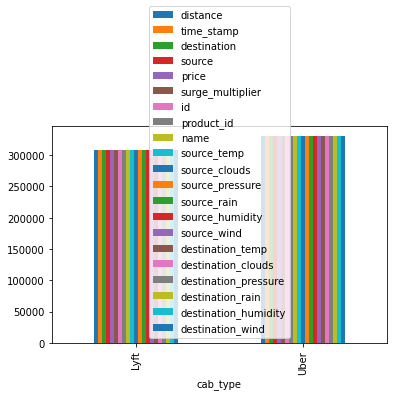

In [42]:
s_data.groupby('cab_type').count().plot.bar()

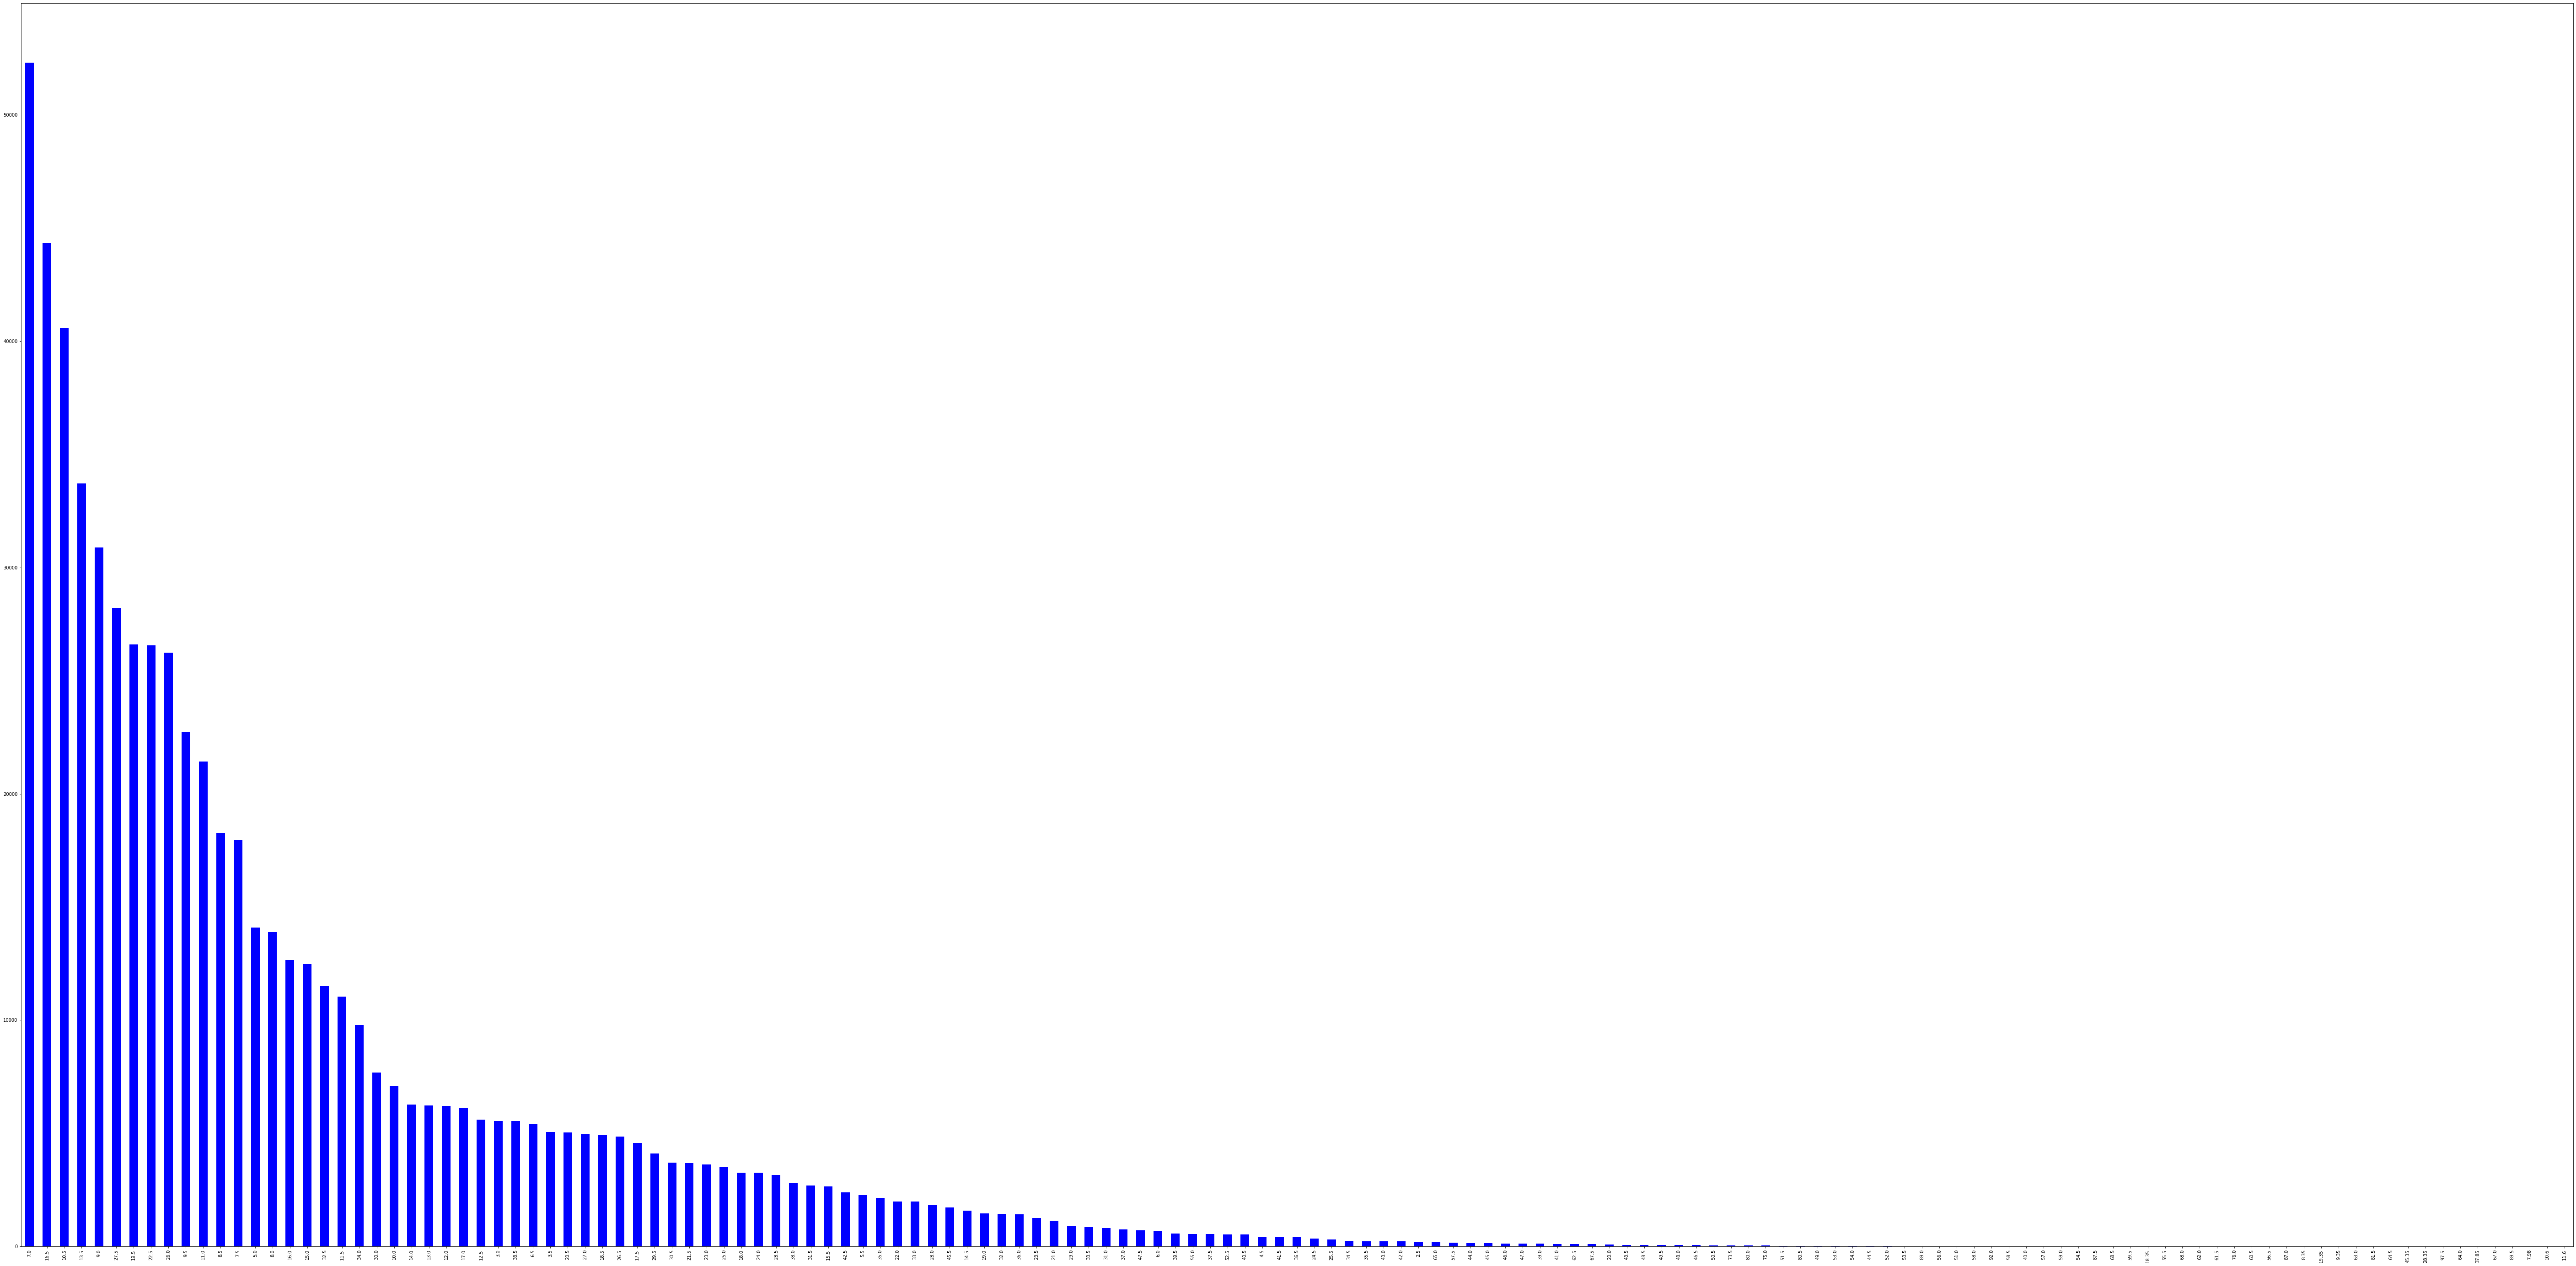

In [43]:
s_data['price'].value_counts().plot(kind='bar', figsize=(100,50),color='blue')

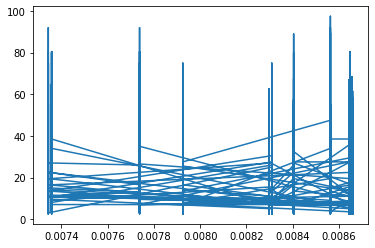

In [44]:
x = s_data['source_rain']
y = s_data['price']
plt.plot(x,y)
plt.show()

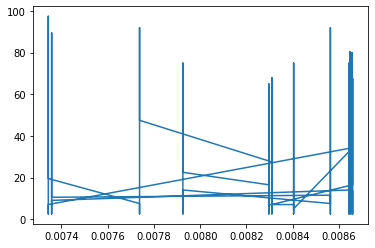

In [45]:
x = s_data['destination_rain']
y = s_data['price']
plt.plot(x,y)
plt.show()

# Function for preprocessing

In [46]:
def onehot_encode(df, column, prefix):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=prefix)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [47]:
df_data = df_data.copy()
#df = df.apply(LabelEncoder().fit_transform)
    
# Drop id column
df_data = df_data.drop('id', axis=1)
    
# Binary encode cab_type column
df_data['cab_type'] = df_data['cab_type'].replace({'Lyft': 0, 'Uber': 1})
    
# One-hot encode remaining categorical columns
for column, prefix in [('destination', "dest"), ('source', "src"), ('product_id', "pid"), ('name', "nm")]:
    df_data = onehot_encode(df_data, column=column, prefix=prefix)
    
# Split df into X and y
y = df_data['price']
X = df_data.drop('price', axis=1)
    
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, shuffle=True, random_state=2022)


In [48]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478482 entries, 118519 to 349053
Data columns (total 64 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   distance                                  478482 non-null  float64
 1   cab_type                                  478482 non-null  int64  
 2   time_stamp                                478482 non-null  int64  
 3   surge_multiplier                          478482 non-null  float64
 4   source_temp                               478482 non-null  float64
 5   source_clouds                             478482 non-null  float64
 6   source_pressure                           478482 non-null  float64
 7   source_rain                               478482 non-null  float64
 8   source_humidity                           478482 non-null  float64
 9   source_wind                               478482 non-null  float64
 10  destination_tem

In [49]:
X_train

,distance,cab_type,time_stamp,surge_multiplier,source_temp,source_clouds,source_pressure,source_rain,source_humidity,source_wind,...,nm_Lux,nm_Lux Black,nm_Lux Black XL,nm_Lyft,nm_Lyft XL,nm_Shared,nm_UberPool,nm_UberX,nm_UberXL,nm_WAV
118519,1.41,1,1545135903638,1.0,39.090841,0.676730,1008.441912,0.008644,0.764054,6.853117,...,0,0,0,0,0,0,0,0,0,0
393473,2.11,0,1544771709869,1.0,39.047285,0.677801,1008.448356,0.008297,0.765048,6.810325,...,0,0,0,1,0,0,0,0,0,0
311252,4.22,0,1543495680814,1.0,38.975086,0.678317,1008.444168,0.007358,0.767648,6.749426,...,0,0,0,0,0,1,0,0,0,0
257576,1.64,1,1543442528376,1.0,38.975086,0.678317,1008.444168,0.007358,0.767648,6.749426,...,0,0,0,0,0,0,0,0,1,0
442958,3.15,0,1544766612149,1.0,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521143,2.80,1,1543684976269,1.0,38.983403,0.677247,1008.441090,0.008657,0.767266,6.816233,...,0,0,0,0,0,0,1,0,0,0
439985,3.05,1,1543662778017,1.0,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755,...,0,0,0,0,0,0,0,1,0,0
103024,2.84,1,1543410385862,1.0,38.975086,0.678317,1008.444168,0.007358,0.767648,6.749426,...,0,0,0,0,0,0,0,0,0,0
147629,1.78,1,1545031810287,1.0,39.394092,0.677495,1008.438031,0.008310,0.755468,6.848948,...,0,0,0,0,0,0,1,0,0,0


In [50]:
X_test

,distance,cab_type,time_stamp,surge_multiplier,source_temp,source_clouds,source_pressure,source_rain,source_humidity,source_wind,...,nm_Lux,nm_Lux Black,nm_Lux Black XL,nm_Lyft,nm_Lyft XL,nm_Shared,nm_UberPool,nm_UberX,nm_UberXL,nm_WAV
470668,4.48,1,1543872776143,1.00,39.410822,0.676730,1008.435793,0.008563,0.754837,6.860019,...,0,0,0,0,0,0,0,1,0,0
632313,1.25,1,1545042003553,1.00,39.410822,0.676730,1008.435793,0.008563,0.754837,6.860019,...,0,0,0,0,0,0,0,1,0,0
478579,1.41,1,1543615083448,1.00,39.082122,0.678432,1008.447820,0.007925,0.764073,6.778528,...,0,0,0,0,0,0,0,0,0,1
236561,1.56,1,1543259109632,1.00,39.047744,0.679235,1008.459254,0.007738,0.763786,6.692180,...,0,0,0,0,0,0,0,0,1,0
154132,2.02,0,1543684677993,1.75,38.975086,0.678317,1008.444168,0.007358,0.767648,6.749426,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185905,2.44,0,1545118508222,1.00,38.964379,0.679866,1008.453289,0.007343,0.767266,6.711721,...,0,1,0,0,0,0,0,0,0,0
384309,1.08,0,1543504080032,1.00,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755,...,0,1,0,0,0,0,0,0,0,0
49041,2.45,1,1544700603922,1.00,38.975086,0.678317,1008.444168,0.007358,0.767648,6.749426,...,0,0,0,0,0,0,0,1,0,0
132259,2.98,1,1543730578609,1.00,39.047744,0.679235,1008.459254,0.007738,0.763786,6.692180,...,0,0,0,0,0,0,1,0,0,0


In [51]:
y_train

118519    18.0
393473     9.0
311252     7.0
257576    13.0
442958     7.0
          ... 
521143    16.5
439985    10.5
103024    20.5
147629     7.5
349053    16.5
Name: price, Length: 478482, dtype: float64

In [52]:
y_test

470668    11.5
632313     8.0
478579     8.0
236561    12.0
154132    38.5
          ... 
185905    22.5
384309    16.5
49041      9.5
132259     8.0
562224    10.5
Name: price, Length: 159494, dtype: float64

In [53]:
df_data

,distance,cab_type,time_stamp,price,surge_multiplier,source_temp,source_clouds,source_pressure,source_rain,source_humidity,...,nm_Lux,nm_Lux Black,nm_Lux Black XL,nm_Lyft,nm_Lyft XL,nm_Shared,nm_UberPool,nm_UberX,nm_UberXL,nm_WAV
0,0.44,0,1544952607890,5.0,1.0,39.067897,0.676711,1008.445239,0.008660,0.764837,...,0,0,0,0,0,1,0,0,0,0
1,0.44,0,1543284023677,11.0,1.0,39.067897,0.676711,1008.445239,0.008660,0.764837,...,1,0,0,0,0,0,0,0,0,0
2,0.44,0,1543366822198,7.0,1.0,39.067897,0.676711,1008.445239,0.008660,0.764837,...,0,0,0,1,0,0,0,0,0,0
3,0.44,0,1543553582749,26.0,1.0,39.067897,0.676711,1008.445239,0.008660,0.764837,...,0,0,1,0,0,0,0,0,0,0
4,0.44,0,1543463360223,9.0,1.0,39.067897,0.676711,1008.445239,0.008660,0.764837,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637971,0.99,0,1543218373178,27.5,1.0,39.410822,0.676730,1008.435793,0.008563,0.754837,...,0,0,1,0,0,0,0,0,0,0
637972,0.99,0,1543218373178,5.0,1.0,39.410822,0.676730,1008.435793,0.008563,0.754837,...,0,0,0,0,0,1,0,0,0,0
637973,0.99,0,1543465761522,16.5,1.0,39.410822,0.676730,1008.435793,0.008563,0.754837,...,0,1,0,0,0,0,0,0,0,0
637974,0.99,0,1544762405152,10.5,1.0,39.410822,0.676730,1008.435793,0.008563,0.754837,...,0,0,0,0,1,0,0,0,0,0


## LINEAR REGRESSION

In [54]:
# Scale X
scaler = StandardScaler()

LX_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
LX_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

In [55]:
LX_train

,distance,cab_type,time_stamp,surge_multiplier,source_temp,source_clouds,source_pressure,source_rain,source_humidity,source_wind,...,nm_Lux,nm_Lux Black,nm_Lux Black XL,nm_Lyft,nm_Lyft XL,nm_Shared,nm_UberPool,nm_UberX,nm_UberXL,nm_WAV
0,-0.686459,0.963885,1.581020,-0.157613,-0.002072,-1.067520,-0.532144,0.901935,0.020766,0.918563,...,-0.295614,-0.295505,-0.29525,-0.294626,-0.295513,-0.296031,-0.307353,-0.307862,-0.307606,-0.3075
1,-0.069724,-1.037468,1.052619,-0.157613,-0.300500,0.025468,0.513188,0.176630,0.256627,0.136103,...,-0.295614,-0.295505,-0.29525,3.394132,-0.295513,-0.296031,-0.307353,-0.307862,-0.307606,-0.3075
2,1.789294,-1.037468,-0.798744,-0.157613,-0.795172,0.552445,-0.166123,-1.788173,0.873494,-0.977452,...,-0.295614,-0.295505,-0.29525,-0.294626,-0.295513,3.378020,-0.307353,-0.307862,-0.307606,-0.3075
3,-0.483818,0.963885,-0.875861,-0.157613,-0.795172,0.552445,-0.166123,-1.788173,0.873494,-0.977452,...,-0.295614,-0.295505,-0.29525,-0.294626,-0.295513,-0.296031,-0.307353,-0.307862,3.250913,-0.3075
4,0.846569,-1.037468,1.045223,-0.157613,-0.382509,-0.794273,-0.386356,0.912331,0.374557,0.601104,...,-0.295614,-0.295505,-0.29525,-0.294626,-0.295513,3.378020,-0.307353,-0.307862,-0.307606,-0.3075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478477,0.538201,0.963885,-0.524099,-0.157613,-0.738185,-0.540543,-0.665524,0.929924,0.782778,0.244137,...,-0.295614,-0.295505,-0.29525,-0.294626,-0.295513,-0.296031,3.253583,-0.307862,-0.307606,-0.3075
478478,0.758464,0.963885,-0.556306,-0.157613,-0.382509,-0.794273,-0.386356,0.912331,0.374557,0.601104,...,-0.295614,-0.295505,-0.29525,-0.294626,-0.295513,-0.296031,-0.307353,3.248206,-0.307606,-0.3075
478479,0.573443,0.963885,-0.922496,-0.157613,-0.795172,0.552445,-0.166123,-1.788173,0.873494,-0.977452,...,-0.295614,-0.295505,-0.29525,-0.294626,-0.295513,-0.296031,-0.307353,-0.307862,-0.307606,-0.3075
478480,-0.360471,0.963885,1.429994,-0.157613,2.075654,-0.286814,-1.161824,0.203818,-2.015804,0.842345,...,-0.295614,-0.295505,-0.29525,-0.294626,-0.295513,-0.296031,3.253583,-0.307862,-0.307606,-0.3075


In [56]:
LX_test

,distance,cab_type,time_stamp,surge_multiplier,source_temp,source_clouds,source_pressure,source_rain,source_humidity,source_wind,...,nm_Lux,nm_Lux Black,nm_Lux Black XL,nm_Lyft,nm_Lyft XL,nm_Shared,nm_UberPool,nm_UberX,nm_UberXL,nm_WAV
0,2.018367,0.963885,-0.251624,-0.157613,2.190282,-1.067520,-1.524743,0.733603,-2.165485,1.044777,...,-0.295614,-0.295505,-0.29525,-0.294626,-0.295513,-0.296031,-0.307353,3.248206,-0.307606,-0.307500
1,-0.827427,0.963885,1.444783,-0.157613,2.190282,-1.067520,-1.524743,0.733603,-2.165485,1.044777,...,-0.295614,-0.295505,-0.29525,-0.294626,-0.295513,-0.296031,-0.307353,3.248206,-0.307606,-0.307500
2,-0.686459,0.963885,-0.625505,-0.157613,-0.061810,0.669551,0.426335,-0.601055,0.025302,-0.445323,...,-0.295614,-0.295505,-0.29525,-0.294626,-0.295513,-0.296031,-0.307353,-0.307862,-0.307606,3.252032
3,-0.554302,0.963885,-1.141980,-0.157613,-0.297356,1.489292,2.281255,-0.992896,-0.042735,-2.024228,...,-0.295614,-0.295505,-0.29525,-0.294626,-0.295513,-0.296031,-0.307353,-0.307862,3.250913,-0.307500
4,-0.149018,-1.037468,-0.524532,7.712609,-0.795172,0.552445,-0.166123,-1.788173,0.873494,-0.977452,...,-0.295614,3.384038,-0.29525,-0.294626,-0.295513,-0.296031,-0.307353,-0.307862,-0.307606,-0.307500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159489,0.221023,-1.037468,1.555782,-0.157613,-0.868534,2.133374,1.313471,-1.818561,0.782778,-1.666912,...,-0.295614,3.384038,-0.29525,-0.294626,-0.295513,-0.296031,-0.307353,-0.307862,-0.307606,-0.307500
159490,-0.977206,-1.037468,-0.786557,-0.157613,-0.382509,-0.794273,-0.386356,0.912331,0.374557,0.601104,...,-0.295614,3.384038,-0.29525,-0.294626,-0.295513,-0.296031,-0.307353,-0.307862,-0.307606,-0.307500
159491,0.229834,0.963885,0.949453,-0.157613,-0.795172,0.552445,-0.166123,-1.788173,0.873494,-0.977452,...,-0.295614,-0.295505,-0.29525,-0.294626,-0.295513,-0.296031,-0.307353,3.248206,-0.307606,-0.307500
159492,0.696790,0.963885,-0.457935,-0.157613,-0.297356,1.489292,2.281255,-0.992896,-0.042735,-2.024228,...,-0.295614,-0.295505,-0.29525,-0.294626,-0.295513,-0.296031,3.253583,-0.307862,-0.307606,-0.307500


In [57]:
np.array(LX_train).reshape(-1,1)

array([[-0.68645932],
       [ 0.96388542],
       [ 1.5810203 ],
       ...,
       [-0.30786228],
       [-0.30760591],
       [-0.30750007]])

In [58]:
np.array(LX_test).reshape(-1,1)

array([[ 2.01836673],
       [ 0.96388542],
       [-0.25162408],
       ...,
       [-0.30786228],
       [-0.30760591],
       [-0.30750007]])

In [59]:
linear = LinearRegression()
linear.fit(LX_train, y_train)

LinearRegression()

In [60]:
prediction = linear.predict(LX_test)
prediction

array([16.23714677,  7.45980302,  7.35225908, ..., 10.27709619,
       10.88879052, 10.63195459])

In [61]:
data = pd.DataFrame({'Actual': y_test, 'predicted' : prediction})
data

,Actual,predicted
470668,11.5,16.237147
632313,8.0,7.459803
478579,8.0,7.352259
236561,12.0,13.474696
154132,38.5,35.567713
...,...,...
185905,22.5,22.605799
384309,16.5,19.165369
49041,9.5,10.277096
132259,8.0,10.888791


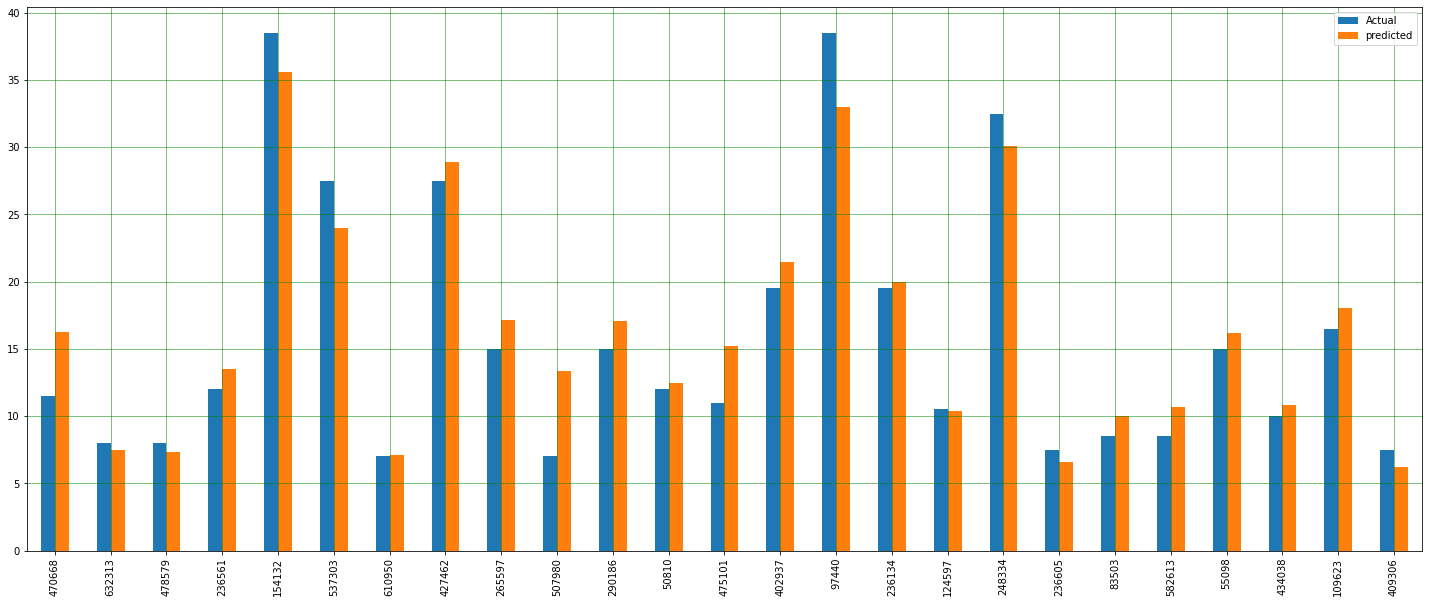

In [62]:
data1 = data.head(25)
data1.plot(kind='bar' ,figsize=(25,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color = 'green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color = 'black')
plt.show()

In [63]:
print("Test R^2 Score: {:.5f}".format(linear.score(LX_test, y_test)))

Test R^2 Score: 0.92844


In [64]:
y_test.head()

470668    11.5
632313     8.0
478579     8.0
236561    12.0
154132    38.5
Name: price, dtype: float64

In [65]:
prediction

array([16.23714677,  7.45980302,  7.35225908, ..., 10.27709619,
       10.88879052, 10.63195459])

In [66]:
Difference = prediction - y_test

(array([9.00000e+00, 2.00000e+01, 5.00000e+01, 1.74000e+02, 7.28000e+02,
        9.60800e+03, 1.31744e+05, 1.66120e+04, 5.31000e+02, 1.80000e+01]),
 array([-37.88150557, -32.1119255 , -26.34234542, -20.57276534,
        -14.80318526,  -9.03360518,  -3.2640251 ,   2.50555497,
          8.27513505,  14.04471513,  19.81429521]),
 <a list of 10 Patch objects>)

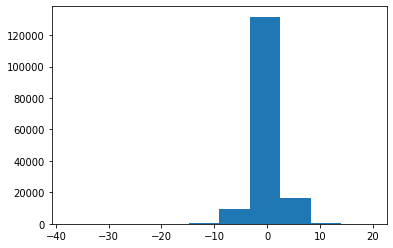

In [67]:
plt.hist(Difference)

In [68]:
mean_squared_error(y_test, prediction) ** 0.5

2.4948287539023375

# Random forest

In [69]:
features = pd.get_dummies(X)
features.columns

Index(['distance', 'cab_type', 'time_stamp', 'surge_multiplier', 'source_temp',
       'source_clouds', 'source_pressure', 'source_rain', 'source_humidity',
       'source_wind', 'destination_temp', 'destination_clouds',
       'destination_pressure', 'destination_rain', 'destination_humidity',
       'destination_wind', 'dest_Back Bay', 'dest_Beacon Hill',
       'dest_Boston University', 'dest_Fenway', 'dest_Financial District',
       'dest_Haymarket Square', 'dest_North End', 'dest_North Station',
       'dest_Northeastern University', 'dest_South Station',
       'dest_Theatre District', 'dest_West End', 'src_Back Bay',
       'src_Beacon Hill', 'src_Boston University', 'src_Fenway',
       'src_Financial District', 'src_Haymarket Square', 'src_North End',
       'src_North Station', 'src_Northeastern University', 'src_South Station',
       'src_Theatre District', 'src_West End',
       'pid_55c66225-fbe7-4fd5-9072-eab1ece5e23e',
       'pid_6c84fd89-3f11-4782-9b50-97c468b19529',

In [70]:
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier

In [71]:
R_data = s_data.head(5000)

In [72]:
R_data = R_data.copy()
#df = df.apply(LabelEncoder().fit_transform)
    
# Drop id column
R_data = R_data.drop('id', axis=1)
    
# Binary encode cab_type column
R_data['cab_type'] = R_data['cab_type'].replace({'Lyft': 0, 'Uber': 1})
    
# One-hot encode remaining categorical columns
for column, prefix in [('destination', "dest"), ('source', "src"), ('product_id', "pid"), ('name', "nm")]:
    R_data = onehot_encode(R_data, column=column, prefix=prefix)
    
# Split df into X and y
Ry = R_data['price']
RX = R_data.drop('price', axis=1)
    
# Train-test split
RX_train, RX_test, Ry_train, Ry_test = train_test_split(X, y, train_size=0.75, shuffle=True, random_state=2022)

In [73]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 2022)
rf.fit(RX_train, Ry_train);

In [74]:
Ry_test

470668    11.5
632313     8.0
478579     8.0
236561    12.0
154132    38.5
          ... 
185905    22.5
384309    16.5
49041      9.5
132259     8.0
562224    10.5
Name: price, Length: 159494, dtype: float64

In [75]:
rpredictions = rf.predict(RX_test)
rpredictions

array([12.28541667,  7.49808333,  8.155     , ...,  9.59      ,
        9.195     , 10.44      ])

In [76]:
rdata = pd.DataFrame({'Actual': Ry_test, 'predicted' : rpredictions})
rdata

,Actual,predicted
470668,11.5,12.285417
632313,8.0,7.498083
478579,8.0,8.155000
236561,12.0,12.885000
154132,38.5,36.295000
...,...,...
185905,22.5,22.500000
384309,16.5,16.500000
49041,9.5,9.590000
132259,8.0,9.195000


In [77]:
errors = abs(rpredictions - Ry_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 1.13 degrees.


In [78]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Ry_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 91.62 %.


In [79]:
Difference = rpredictions - Ry_test

(array([5.00000e+00, 9.00000e+00, 3.40000e+01, 1.87000e+02, 2.37000e+03,
        1.49598e+05, 7.22600e+03, 6.00000e+01, 4.00000e+00, 1.00000e+00]),
 array([-40.585, -33.369, -26.153, -18.937, -11.721,  -4.505,   2.711,
          9.927,  17.143,  24.359,  31.575]),
 <a list of 10 Patch objects>)

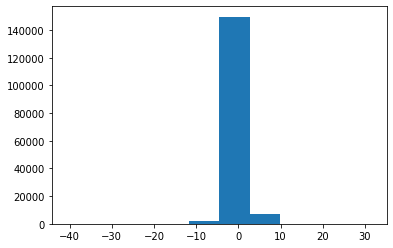

In [80]:
plt.hist(Difference)

## Logistic Regression

In [81]:
LR_data = s_data.head(5000)

In [82]:
LR_data = LR_data.copy()
#df = df.apply(LabelEncoder().fit_transform)
    
# Drop id column
LR_data = LR_data.drop('id', axis=1)
    
# Binary encode cab_type column
LR_data['cab_type'] =LR_data['cab_type'].replace({'Lyft': 0, 'Uber': 1})
    
# One-hot encode remaining categorical columns
for column, prefix in [('destination', "dest"), ('source', "src"), ('product_id', "pid"), ('name', "nm")]:
    LR_data = onehot_encode(LR_data, column=column, prefix=prefix)
    
# Split df into X and y
LRy = LR_data['price']
LRX = LR_data.drop('price', axis=1)
    
# Train-test split
LRX_train, LRX_test, LRy_train, LRy_test = train_test_split(X, y, train_size=0.75, shuffle=True, random_state=2022)

#Scale X
scaler = StandardScaler()
scaler.fit(LRX_train)
    
LRX_train = pd.DataFrame(scaler.transform(LRX_train), columns=X.columns)
LRX_test = pd.DataFrame(scaler.transform(LRX_test), columns=X.columns)

In [83]:
t3 = LRX_train.copy()

In [84]:
t4 = LRy_train.copy()

In [85]:
lab_enc = preprocessing.LabelEncoder()
t4 = lab_enc.fit_transform(t4)
print(t4)
print(utils.multiclass.type_of_target(t4))
print(utils.multiclass.type_of_target(t4.astype('int')))
print(utils.multiclass.type_of_target(t4))

[34 14  8 ... 41  9 31]
multiclass
multiclass
multiclass


In [88]:
model = LogisticRegression(max_iter = 5000)
model.fit(t3, t4)

LogisticRegression(max_iter=5000)

In [ ]:
t5 = LRX_test.copy()

In [87]:
lab_enc = preprocessing.LabelEncoder()
t4 = lab_enc.fit_transform(t4)
print(t4)
print(utils.multiclass.type_of_target(t4))
print(utils.multiclass.type_of_target(t4.astype('int')))
print(utils.multiclass.type_of_target(t4))

[34 14  8 ... 41  9 31]
multiclass
multiclass
multiclass


In [89]:
Lpredictions = model.predict(LRX_test)
Lpredictions

array([24,  8,  9, ..., 17, 14, 14])

In [90]:
lrdata = pd.DataFrame({'Actual': Ry_test, 'predicted' : Lpredictions})
lrdata

,Actual,predicted
470668,11.5,24
632313,8.0,8
478579,8.0,9
236561,12.0,24
154132,38.5,66
...,...,...
185905,22.5,45
384309,16.5,31
49041,9.5,17
132259,8.0,14


In [3]:
errors = abs(Lpredictions - LRy_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

NameError: name 'Lpredictions' is not defined

In [2]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / LRy_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

NameError: name 'errors' is not defined

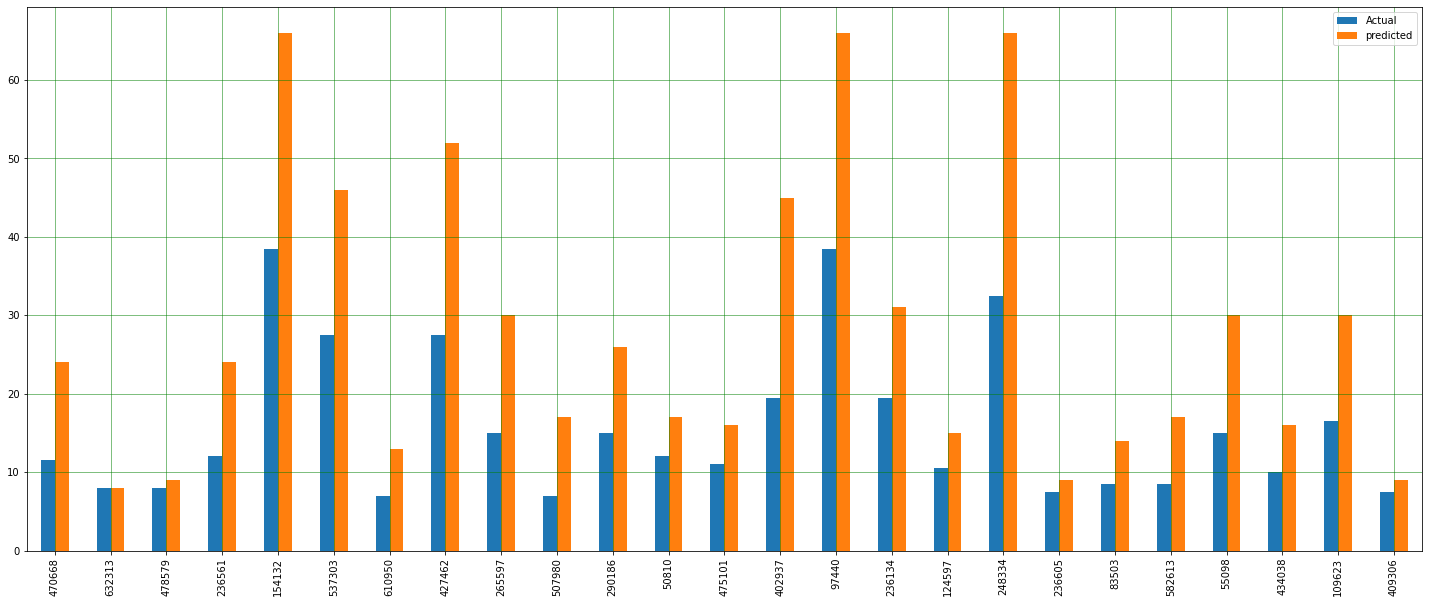

In [94]:
data2 = lrdata.head(25)
data2.plot(kind='bar' ,figsize=(25,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color = 'green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color = 'black')
plt.show()

In [97]:
t7 = LRy_test.copy()

In [98]:
lab_enc = preprocessing.LabelEncoder()
t7 = lab_enc.fit_transform(t7)
print(t7)
print(utils.multiclass.type_of_target(t7))
print(utils.multiclass.type_of_target(t7.astype('int')))
print(utils.multiclass.type_of_target(t7))

[18 10 10 ... 14 10 16]
multiclass
multiclass
multiclass


In [108]:
np.array(t7).reshape(-1,1)

array([[18],
       [10],
       [10],
       ...,
       [14],
       [10],
       [16]])

In [1]:
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import metrics
y_pred_proba = model.predict_proba(t7)[::,1]
fpr, tpr, _ = metrics.roc_curve(t7,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

NameError: name 'model' is not defined